# importing libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import warnings
import plotly.graph_objs as go
import seaborn as sns 
import plotly as py
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

# load data and preprocess

In [4]:
data = pd.read_csv('/kaggle/input/customer-clustering/segmentation data.csv')
print(df.info())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB
None


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [5]:
# Check for missing values
print(data.isnull().sum())


ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64


In [6]:
from sklearn.preprocessing import OneHotEncoder

# List of categorical columns
categorical_columns = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the categorical features
encoded_features = encoder.fit_transform(data[categorical_columns])

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Drop the original categorical columns and concatenate the encoded features
data = data.drop(categorical_columns, axis=1)
data = pd.concat([data, encoded_df], axis=1)


In [7]:
# List of numerical columns
numerical_columns = ['Age', 'Income']  

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

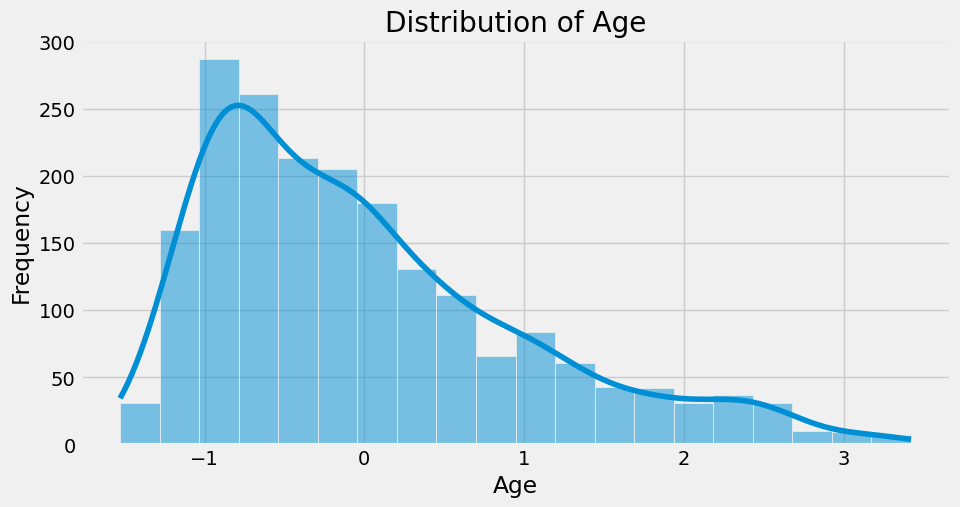

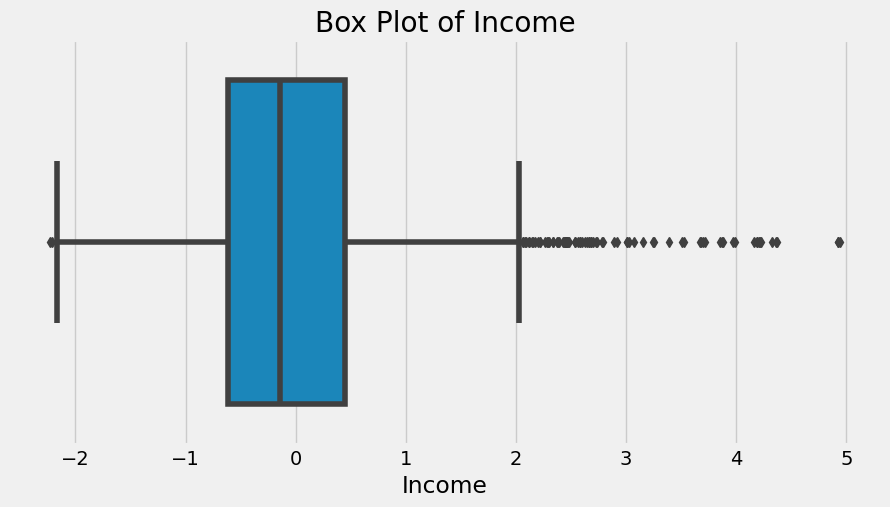

In [8]:
# Histogram for Age
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box Plot for Income
plt.figure(figsize=(10, 5))
sns.boxplot(x='Income', data=data)
plt.title('Box Plot of Income')
plt.xlabel('Income')
plt.show()

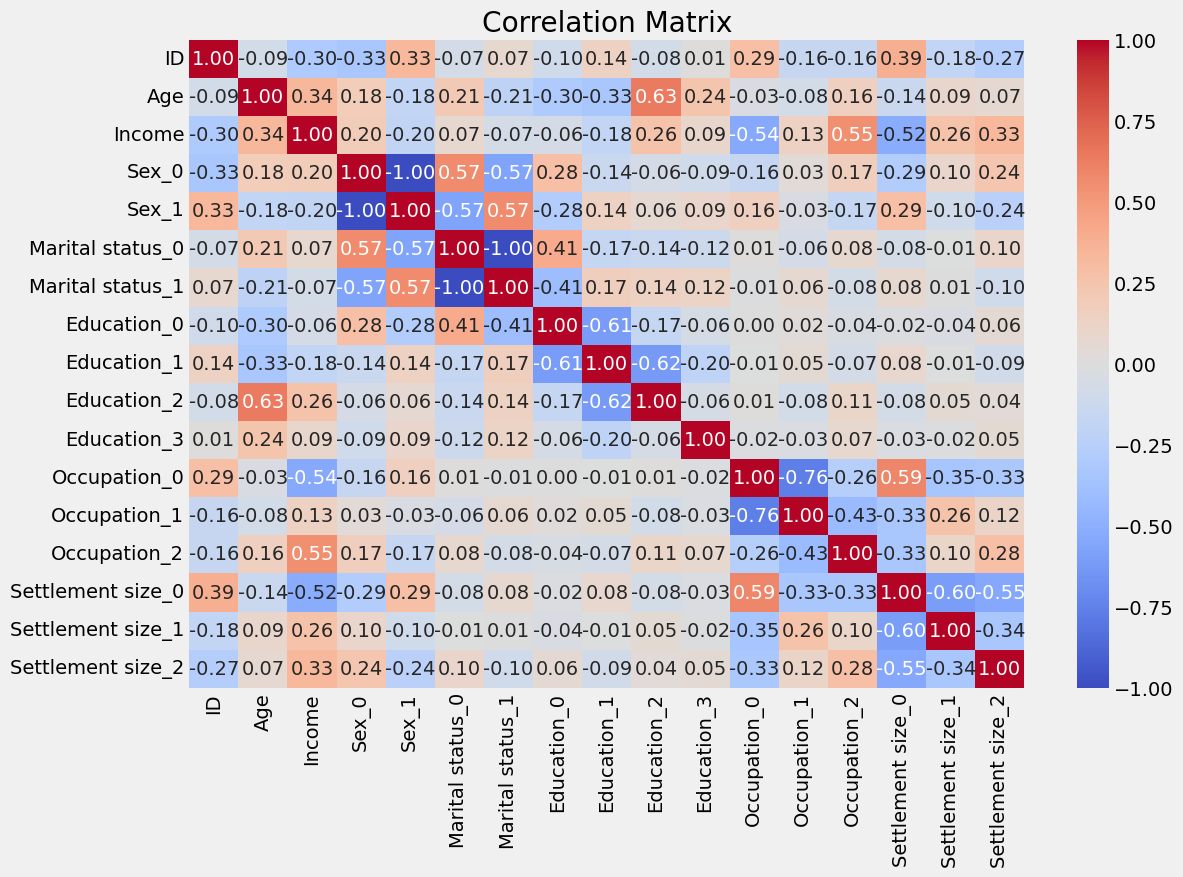

In [9]:
corr = data.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


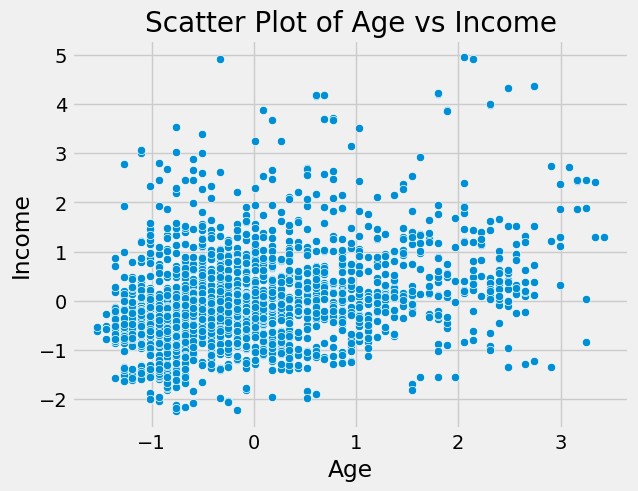

In [13]:
sns.scatterplot(x=data['Age'], y=data['Income'])
plt.title('Scatter Plot of Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

# apply KMeans

In [14]:


# List of features for clustering
features = ['Age', 'Income']  

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])


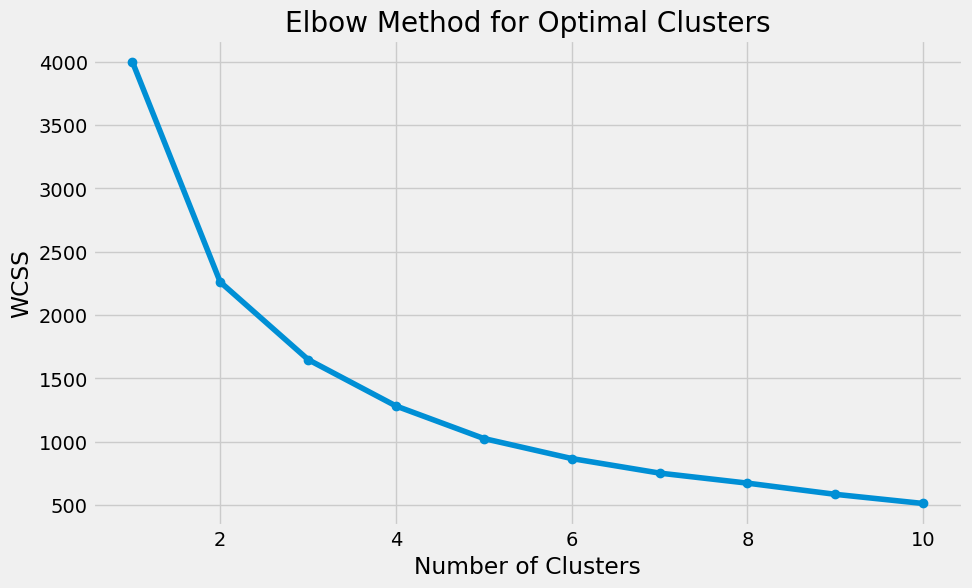

In [15]:
# Determine optimal number of clusters
wcss = []
for i in range(1, 11):  # Test from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

****based on the plot number of optimal clusters is 4 lets continue with it****

In [18]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster information to original data
data['Cluster'] = clusters

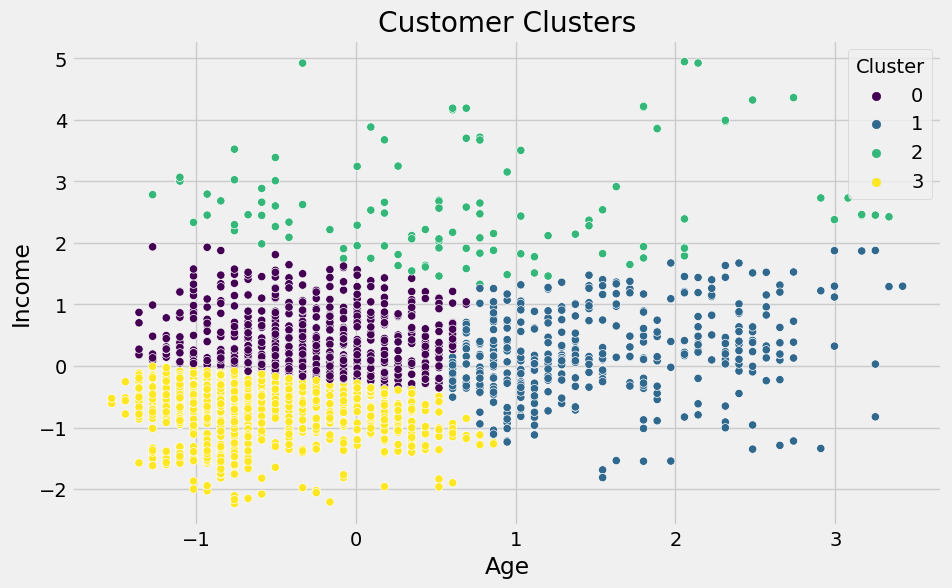

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['Income'], hue=data['Cluster'], palette='viridis')
plt.title('Customer Clusters')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


# analyze clusters

In [20]:
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)


                   ID       Age    Income     Sex_0     Sex_1  \
Cluster                                                         
0        1.000009e+08 -0.273475  0.428989  0.625806  0.374194   
1        1.000009e+08  1.505036  0.205922  0.640704  0.359296   
2        1.000007e+08  0.748964  2.628399  0.745614  0.254386   
3        1.000012e+08 -0.593124 -0.746045  0.412442  0.587558   

         Marital status_0  Marital status_1  Education_0  Education_1  \
Cluster                                                                 
0                0.538710          0.461290     0.174194     0.769355   
1                0.620603          0.379397     0.000000     0.414573   
2                0.631579          0.368421     0.140351     0.438596   
3                0.407834          0.592166     0.187788     0.799539   

         Education_2  Education_3  Occupation_0  Occupation_1  Occupation_2  \
Cluster                                                                       
0           

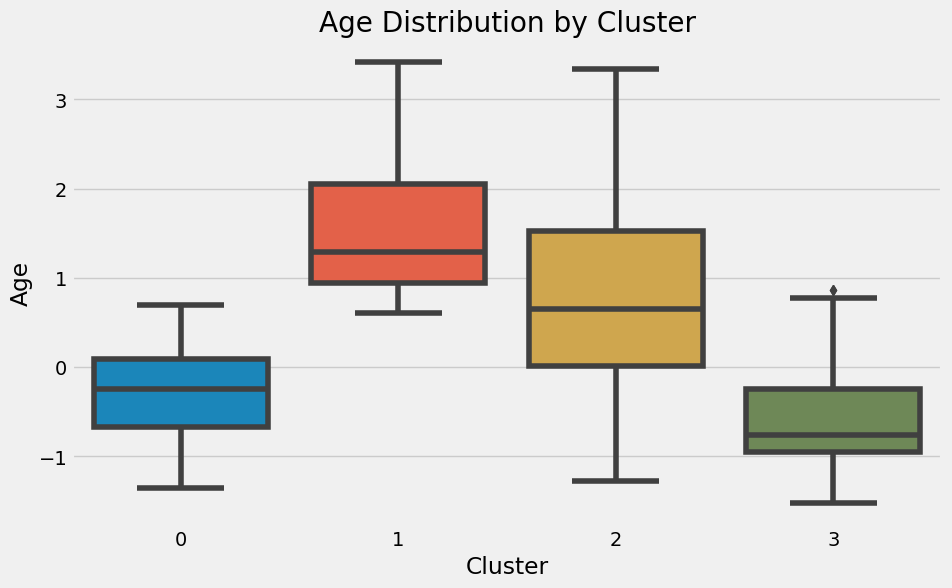

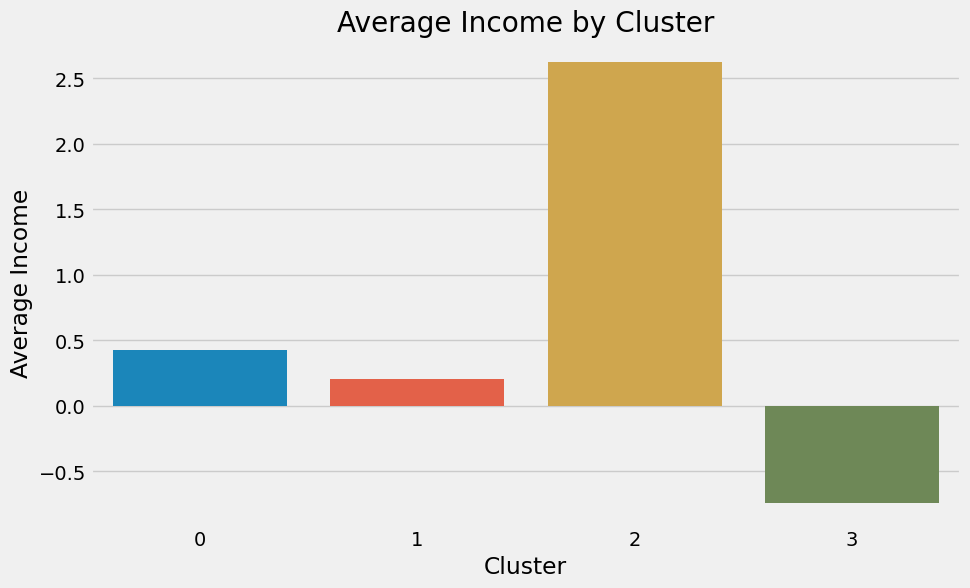

In [21]:
# Box Plot of Age by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=data)
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

# Bar Plot of Income by Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_summary.index, y=cluster_summary['Income'])
plt.title('Average Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Income')
plt.show()
